In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp


In [63]:
df = pd.read_excel("Cópia de Base_dados_-_Rotatividade_RH.xlsx")
df.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


Quais as principais características que fazem um profissional sair da empresa?
- Qual percentual total comparado com os que não se demitiram?
- Qual o tempo médio de permanência e com está distribuído (Histograma)?
- O nível de satisfação, Horas extras, desempenho influencia nessa decisão? (Profissionais muito bons saem para um oportunidade "melhor, profissionais ruins estão tendo a síndrome do impostor?)

In [64]:
desligados = df.loc[df['Desligamento']== 1]
desligados

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
5,2022-05-25,2024-05-14,24,43,4.328231,3.209761,Sênior,10466.00,13.933565,1
7,2023-08-18,2024-05-14,9,30,1.086755,1.908626,Pleno,6058.88,13.626713,1
12,2022-03-26,2024-05-14,26,28,2.733115,1.820046,Pleno,7252.12,6.230965,1
20,2022-10-22,2024-05-14,19,27,4.123725,4.465835,Pleno,7359.37,2.489000,1
...,...,...,...,...,...,...,...,...,...,...
634,2021-08-28,2024-05-14,33,24,3.942960,1.273013,Junior,4561.45,19.068107,1
639,2023-11-16,2024-05-14,6,23,3.000086,4.095554,Junior,2313.07,5.863529,1
640,2022-04-25,2024-05-14,25,32,4.986163,4.746069,Pleno,4353.67,0.089801,1
642,2022-09-22,2024-05-14,20,23,4.721714,3.340184,Pleno,4709.75,19.098905,1


(array([27., 16., 15., 10.,  8., 20., 12., 11.,  6., 19.]),
 array([ 3. ,  6.2,  9.4, 12.6, 15.8, 19. , 22.2, 25.4, 28.6, 31.8, 35. ]),
 <BarContainer object of 10 artists>)

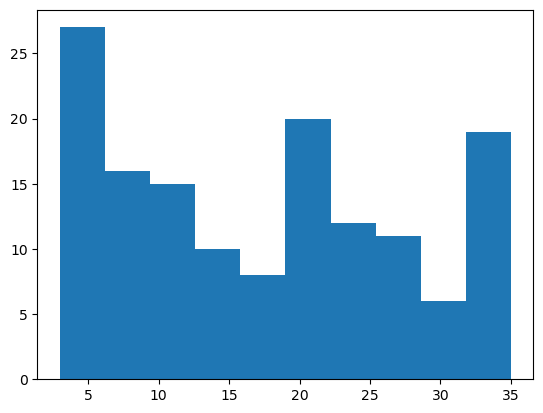

In [65]:
plt.hist(desligados['Meses_de_Servico'])

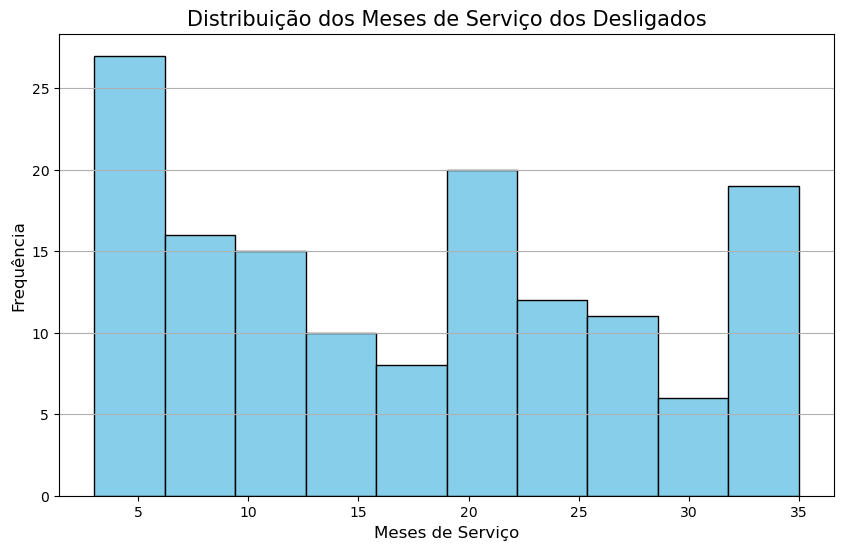

In [66]:
plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura
plt.hist(desligados['Meses_de_Servico'], bins=10, color='skyblue', edgecolor='black')  # Ajustar bins, cor e borda

# Título e rótulos dos eixos
plt.title('Distribuição dos Meses de Serviço dos Desligados', fontsize=15)
plt.xlabel('Meses de Serviço', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Adicionar uma grade
plt.grid(axis='y', alpha=1)

# Mostrar o gráfico
plt.show()

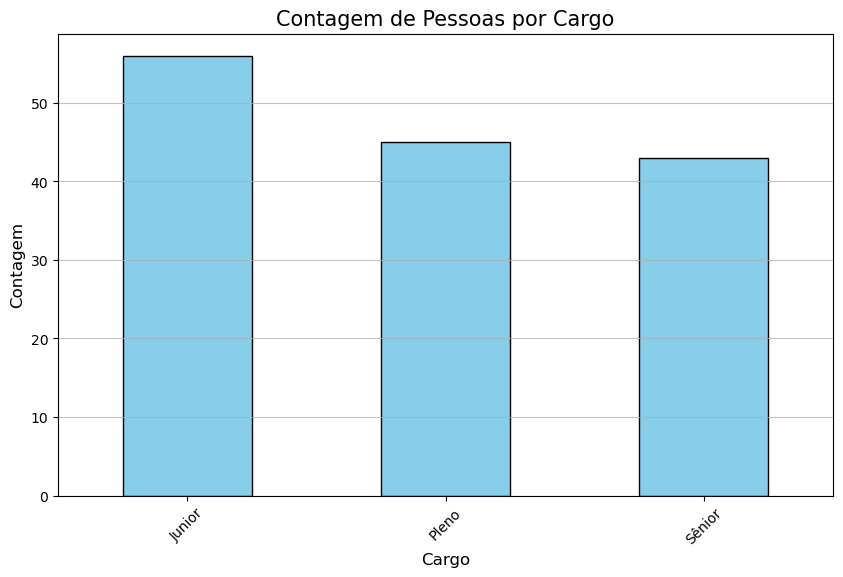

In [67]:
contagem_por_cargo = desligados['Nivel_Cargo'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura
contagem_por_cargo.plot(kind='bar', color='skyblue', edgecolor='black')

# Título e rótulos dos eixos
plt.title('Contagem de Pessoas por Cargo', fontsize=15)
plt.xlabel('Cargo', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Adicionar uma grade
plt.grid(axis='y', alpha=0.75)

# Rotacionar os rótulos do eixo x para melhor visualização, se necessário
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()

Motivo de saída
- Pleno: Alto desempenho
- Sênior: Número alto de horas extras, desempenho, baixa satisfação

In [68]:
df_senior = df.loc[df['Nivel_Cargo']=='Sênior']

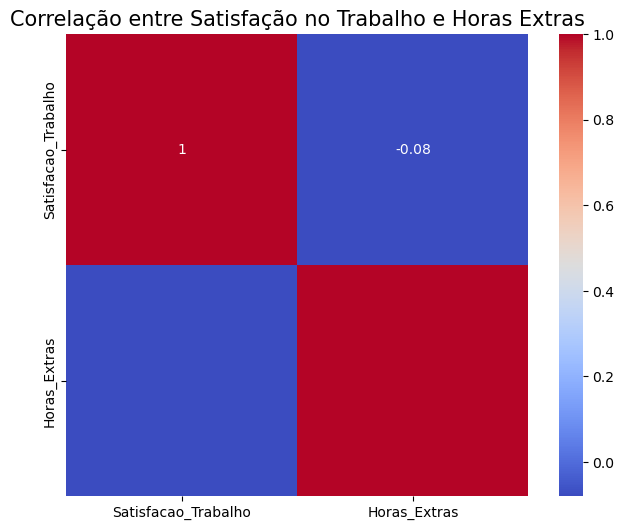

In [69]:

# Selecionar as colunas relevantes
df_selecionado = df_senior[['Satisfacao_Trabalho', 'Horas_Extras']]

# Calcular a matriz de correlação
matriz_corr = df_selecionado.corr()

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', cbar=True, square=True)

# Título e ajustes
plt.title('Correlação entre Satisfação no Trabalho e Horas Extras', fontsize=15)

# Mostrar o gráfico
plt.show()


Média de Junior ativo e desligado

In [77]:
medias = ['Pontuacao_Desempenho','Satisfacao_Trabalho','Salario','Horas_Extras','Idade']
df_junior_ativo = df[(df['Nivel_Cargo'] == 'Junior') & (df['Desligamento'] == 0)]
medias_junior_ativo = df_junior_ativo[medias].mean()
medias_junior_ativo

Pontuacao_Desempenho       3.003533
Satisfacao_Trabalho        2.898736
Salario                 3528.247458
Horas_Extras               9.593403
Idade                     20.898305
dtype: float64

In [71]:
medias = ['Pontuacao_Desempenho','Satisfacao_Trabalho','Salario','Horas_Extras','Idade']
df_junior_desligado = df[(df['Nivel_Cargo'] == 'Junior') & (df['Desligamento'] == 1)]
medias_junior_desligado = df_junior_desligado[medias].mean()
medias_junior_desligado

Pontuacao_Desempenho       3.155307
Satisfacao_Trabalho        2.826735
Salario                 3487.847500
Horas_Extras               9.818018
Idade                     20.892857
dtype: float64

Média de Sêniors ativos e desligados

In [72]:
medias = ['Pontuacao_Desempenho','Satisfacao_Trabalho','Salario','Horas_Extras','Idade']
df_Senior_desligado = df[(df['Nivel_Cargo'] == 'Sênior') & (df['Desligamento'] == 1)]
medias_Senior_desligado = df_Senior_desligado[medias].mean()
medias_Senior_desligado

Pontuacao_Desempenho       3.520831
Satisfacao_Trabalho        2.588305
Salario                 9492.402791
Horas_Extras              19.688996
Idade                     38.139535
dtype: float64

In [73]:
medias = ['Pontuacao_Desempenho','Satisfacao_Trabalho','Salario','Horas_Extras','Idade']
df_Senior_ativo = df[(df['Nivel_Cargo'] == 'Sênior') & (df['Desligamento'] == 0)]
medias_Senior_ativo = df_Senior_ativo[medias].mean()
medias_Senior_ativo

Pontuacao_Desempenho       3.064078
Satisfacao_Trabalho        3.050960
Salario                 9498.312081
Horas_Extras               9.477452
Idade                     37.362416
dtype: float64

Média Plenos ativos e desligados

In [74]:
medias = ['Pontuacao_Desempenho','Satisfacao_Trabalho','Salario','Horas_Extras','Idade']
df_pleno_desligado = df[(df['Nivel_Cargo'] == 'Pleno') & (df['Desligamento'] == 1)]
medias_pleno_desligado = df_pleno_desligado[medias].mean()
medias_pleno_desligado

Pontuacao_Desempenho       3.324749
Satisfacao_Trabalho        3.241992
Salario                 6105.076000
Horas_Extras               8.418150
Idade                     28.622222
dtype: float64

In [75]:
medias = ['Pontuacao_Desempenho','Satisfacao_Trabalho','Salario','Horas_Extras','Idade']
df_pleno_ativo = df[(df['Nivel_Cargo'] == 'Pleno') & (df['Desligamento'] == 0)]
medias_pleno_ativo = df_pleno_ativo[medias].mean()
medias_pleno_ativo

Pontuacao_Desempenho       2.788730
Satisfacao_Trabalho        2.934565
Salario                 5930.900500
Horas_Extras               9.326867
Idade                     28.127778
dtype: float64